In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import requests
import json
%matplotlib inline

In [2]:
df = pd.read_csv('byStation.csv')
df.columns = ['STATION','DATE','ENTRIES','EXITS']
# df_final = pd.read_pickle('df_final.pickle')
df_final = pd.read_pickle('df_final_update.pickle')

In [3]:
df_final['weekday'] = pd.to_datetime(df_final['DATE']).dt.weekday
# df_final['Volume'] = df_final.ENTRIES + df_final.EXITS
df_final.head()

,STATION,DATE,ENTRIES,EXITS,name,weekday,lat,long,volume
0,1 AV,01/01/2018,8427,9924,1st Ave,0,40.730975,-73.981681,18351
1,1 AV,01/02/2018,18668,21328,1st Ave,1,40.730975,-73.981681,39996
2,1 AV,01/03/2018,20417,22357,1st Ave,2,40.730975,-73.981681,42774
3,1 AV,01/04/2018,12010,13472,1st Ave,3,40.730975,-73.981681,25482
4,1 AV,01/05/2018,18891,21966,1st Ave,4,40.730975,-73.981681,40857


In [4]:
byMean = df_final.groupby('STATION').mean()
byMeanWeekend = df_final[df_final.weekday>4].groupby('STATION').mean()
byMeanWeek = df_final[df_final.weekday<=4].groupby('STATION').mean()

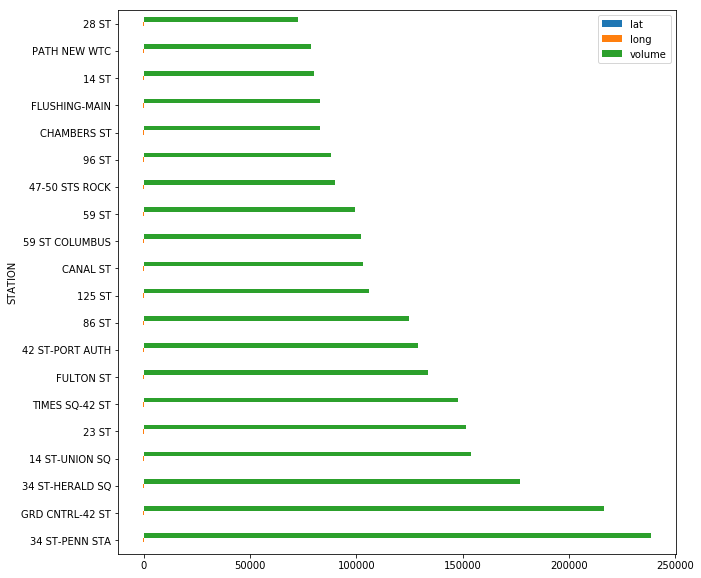

In [5]:
plt.figure()
byMean.sort_values('volume',ascending=False).drop(['ENTRIES', 'EXITS', 'weekday'], axis = 1).head(20).plot(kind='barh', figsize=(10,10))

In [6]:
top_stations = [x for x in byMeanWeek.sort_values('volume',ascending=False).reset_index().head(30)['STATION']]
df_top_stations = byMean.reset_index()[byMean.reset_index()['STATION'].isin(top_stations)]
top_stations

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 'FULTON ST',
 '42 ST-PORT AUTH',
 '86 ST',
 '125 ST',
 '59 ST COLUMBUS',
 '59 ST',
 '47-50 STS ROCK',
 'CANAL ST',
 'CHAMBERS ST',
 '96 ST',
 'PATH NEW WTC',
 'FLUSHING-MAIN',
 '14 ST',
 '28 ST',
 'WALL ST',
 '50 ST',
 'LEXINGTON AV/53',
 '72 ST',
 '42 ST-BRYANT PK',
 'JKSN HT-ROOSVLT',
 'ATL AV-BARCLAY',
 'W 4 ST-WASH SQ',
 '7 AV',
 'JAMAICA CENTER']

In [85]:
byDay = df_final.groupby(['weekday','STATION']).mean()
df_top_stations_byDay = byDay.reset_index()[byDay.reset_index()['STATION'].isin(top_stations[0:10])]
df_top_stations_byDay.head()

,weekday,STATION,ENTRIES,EXITS,lat,long,volume
9,0,125 ST,62199.403846,49354.269231,40.807754,-73.945495,111553.673077
14,0,14 ST-UNION SQ,82629.153846,77584.692308,40.808719,-73.907657,160213.846154
46,0,23 ST,94477.230769,73660.788462,40.884667,-73.900870,168138.019231
59,0,34 ST-HERALD SQ,95317.365385,95985.211538,40.750373,-73.991057,191302.576923
61,0,34 ST-PENN STA,142842.096154,119795.826923,40.750373,-73.991057,262637.923077


Text(0,0.5,'Volume of Traffic')

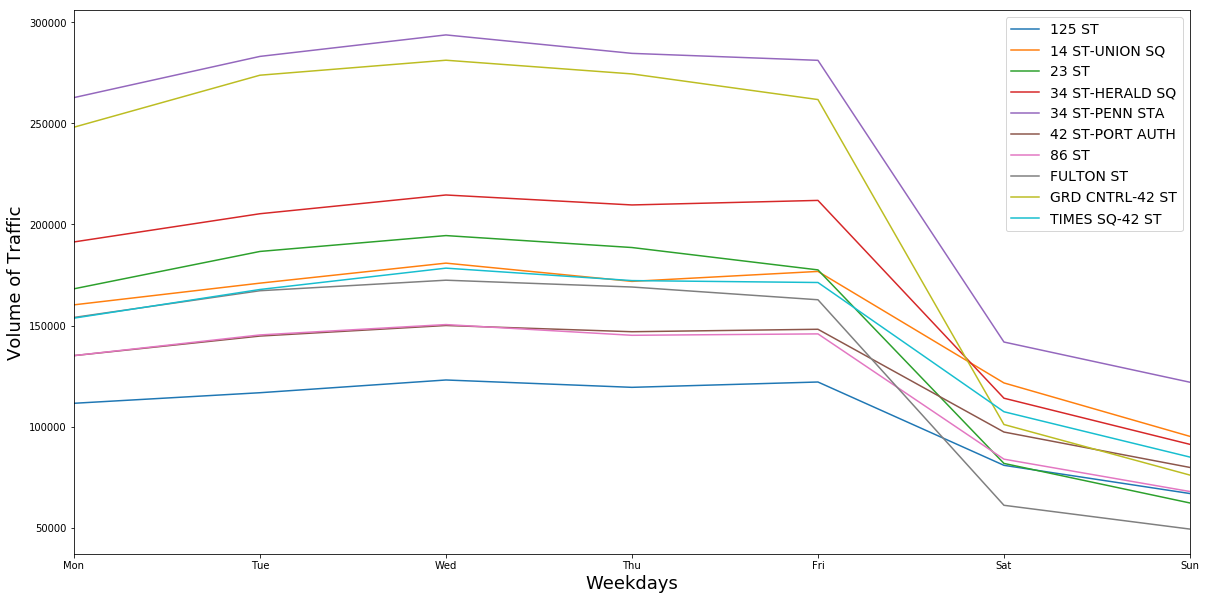

In [117]:
#plot the volume of traffic for every day

traffic = []
weekdays = [0, 1, 2, 3, 4, 5, 6]
weekdays_name = ['Mon', 'Tue', 'Wed','Thu', 'Fri', 'Sat', 'Sun']
stationNames = [x for x in df_top_stations_byDay[df_top_stations_byDay['weekday'] == 0]["STATION"]]


for day in weekdays:
    traffic.append([x for x in df_top_stations_byDay[df_top_stations_byDay['weekday'] == day].reset_index()["volume"]])

plt.figure()
df = pd.DataFrame(traffic, index=weekdays_name, columns=stationNames)
ax = df.plot(figsize = (20,10))
ax.legend(fontsize=14)
ax.set_xlabel('Weekdays', fontsize=18)
ax.set_ylabel('Volume of Traffic', fontsize=18)


In [9]:
df = pd.read_pickle('merged_MTA_final.pickle')

df['Women_ratio'] = df['Women'] / (df['Women'] + df['Men'])
df.head()

,STATION,ENTRIES,EXITS,volume,geo,CensusTract,County,Borough,TotalPop,Men,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,InTechZone,Women_ratio
0,1 AV,16640.285714,17975.576923,34615.862637,"(40.7309749758, -73.9816808749)",36061003400,New York,Manhattan,6476,3163,...,6.0,30.0,4480,86.9,4.9,7.9,0.4,5.1,False,0.511581
1,103 ST,24898.337912,15611.291209,40509.629121,"(40.7994460003, -73.9683789996)",36061019100,New York,Manhattan,9545,4107,...,5.7,31.4,6057,73.5,12.1,14.4,0.0,5.0,False,0.569722
2,103 ST-CORONA,16990.513736,10904.483516,27894.997253,"(40.7994460003, -73.9683789996)",36061019100,New York,Manhattan,9545,4107,...,5.7,31.4,6057,73.5,12.1,14.4,0.0,5.0,False,0.569722
3,104 ST,2476.923077,701.524725,3178.447802,"(40.6817110011, -73.8376830006)",36081009400,Queens,Queens,2962,1443,...,2.6,48.0,1386,80.0,12.1,7.0,0.9,11.3,False,0.512829
4,110 ST,9581.337912,6975.239011,16556.576923,"(40.7950200001, -73.9442499969)",36061017200,New York,Manhattan,5655,3075,...,7.3,32.0,2578,76.9,9.9,11.2,2.0,13.1,False,0.456233


In [10]:
mergeded_MTA_census_top = df[df['STATION'].isin(top_stations)].reset_index().drop(['index'], axis = 1)
mergeded_MTA_census_top.head(10)

,STATION,ENTRIES,EXITS,volume,geo,CensusTract,County,Borough,TotalPop,Men,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,InTechZone,Women_ratio
0,125 ST,58333.401099,47489.258242,105822.659341,"(40.8077539992, -73.9454950001)",36061020000,New York,Manhattan,3176,1287,...,9.3,32.4,1783,72.6,12.6,14.8,0.0,3.1,False,0.594773
1,14 ST,42314.082418,37803.851648,80117.934066,"(40.6817110011, -73.8376830006)",36081009400,Queens,Queens,2962,1443,...,2.6,48.0,1386,80.0,12.1,7.0,0.9,11.3,False,0.512829
2,14 ST-UNION SQ,78714.134615,75190.552198,153904.686813,"(40.8087190009, -73.9076569994)",36005003100,Bronx,Bronx,1466,769,...,0.0,40.1,722,79.2,10.2,10.5,0.0,6.6,False,0.475443
3,23 ST,84724.524725,66607.587912,151332.112637,"(40.8846670006, -73.9008700002)",36005028300,Bronx,Bronx,3370,1449,...,2.9,38.2,1251,68.5,20.6,10.9,0.0,12.5,False,0.570030
4,28 ST,36918.604396,35594.884615,72513.489011,"(40.8846670006, -73.9008700002)",36005028300,Bronx,Bronx,3370,1449,...,2.9,38.2,1251,68.5,20.6,10.9,0.0,12.5,False,0.570030
5,34 ST-HERALD SQ,87010.483516,89816.538462,176827.021978,"(40.750373, -73.9910569991)",36061010100,New York,Manhattan,1259,758,...,7.9,23.6,932,90.7,3.6,5.7,0.0,5.7,True,0.397935
6,34 ST-PENN STA,127057.491758,111318.032967,238375.524725,"(40.750373, -73.9910569991)",36061010100,New York,Manhattan,1259,758,...,7.9,23.6,932,90.7,3.6,5.7,0.0,5.7,True,0.397935
7,42 ST-BRYANT PK,30123.506887,31209.195592,61332.702479,"(40.7541840013, -73.984590999)",36061011300,New York,Manhattan,126,96,...,3.7,17.9,108,95.4,4.6,0.0,0.0,0.0,True,0.238095
8,42 ST-PORT AUTH,69825.346154,59053.791209,128879.137363,"(40.7573079986, -73.9897350009)",36061011900,New York,Manhattan,1068,699,...,15.6,16.5,379,79.9,2.1,17.9,0.0,12.9,True,0.345506
9,47-50 STS ROCK,42932.348901,47049.876374,89982.225275,"(40.7586410016, -73.9813310023)",36061009600,New York,Manhattan,149,87,...,7.8,25.7,116,100.0,0.0,0.0,0.0,4.1,True,0.416107


Text(0,0.5,'Station')

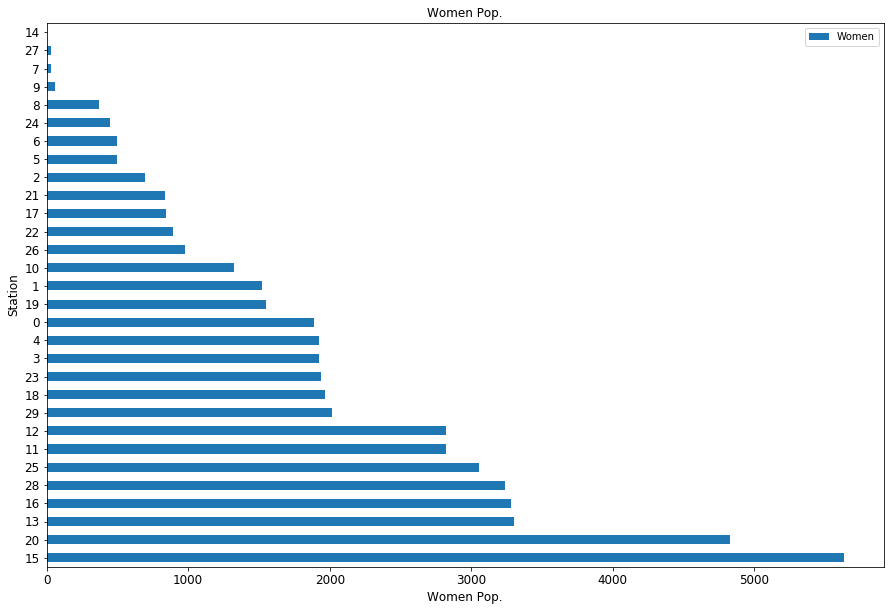

In [11]:
#filter merged data for top stations in volume of traffic
plt.figure()

ax = mergeded_MTA_census_top[['Women','STATION']].sort_values('Women',ascending=False).plot(kind='barh', title ="Women Pop.",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Women Pop.",fontsize=12)
ax.set_ylabel("Station",fontsize=12)

Text(0,0.5,'Station')

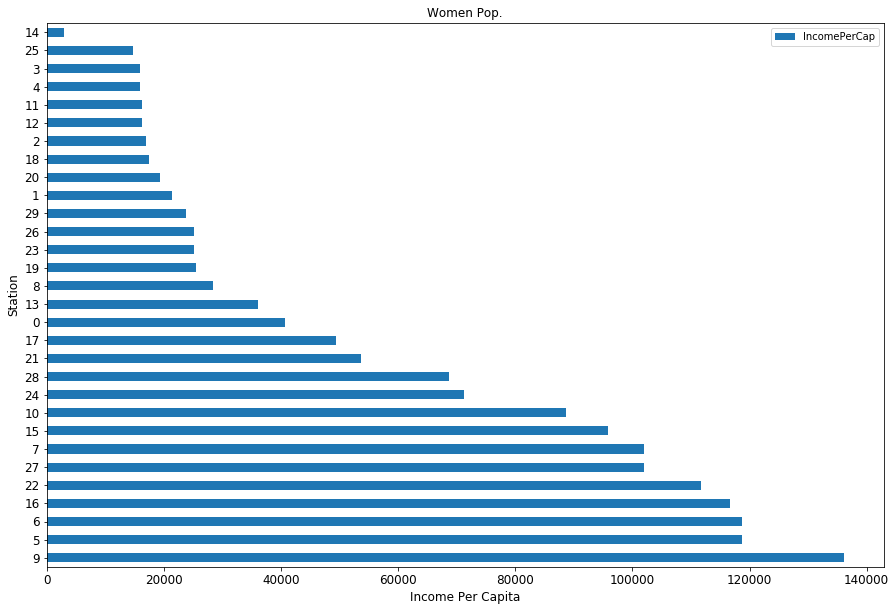

In [12]:
plt.figure()

ax = mergeded_MTA_census_top[['IncomePerCap','STATION']].sort_values('IncomePerCap',ascending=False).plot(kind='barh', title ="Women Pop.",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Income Per Capita",fontsize=12)
ax.set_ylabel("Station",fontsize=12)

In [79]:
normalized_df = pd.DataFrame()
normalized_df['Station'] = mergeded_MTA_census_top['STATION']

In [80]:
def boolean_conv(input):
    if input == True:
        return 1
    else:
        return 0

In [82]:
normalized_df['Traffic']=(mergeded_MTA_census_top['volume']-mergeded_MTA_census_top['volume'].min())/(mergeded_MTA_census_top['volume'].max()-mergeded_MTA_census_top['volume'].min())
normalized_df['Income']=(mergeded_MTA_census_top['IncomePerCap']-mergeded_MTA_census_top['IncomePerCap'].min())/(mergeded_MTA_census_top['IncomePerCap'].max()-mergeded_MTA_census_top['IncomePerCap'].min())
normalized_df['Women_ratio'] = mergeded_MTA_census_top['Women_ratio']
normalized_df['InTechZone'] = mergeded_MTA_census_top['InTechZone'].apply(boolean_conv)


In [83]:
normalized_df['rank_score'] = 3*normalized_df['Traffic'] + 2*normalized_df['Income'] + 2*normalized_df['Women_ratio'] + 1*normalized_df['InTechZone']

In [84]:
normalized_df.sort_values(by =['rank_score'], ascending=False).set_index('Station')

,Traffic,Income,Women_ratio,InTechZone,rank_score
Station,,,,,
34 ST-PENN STA,1.000000,0.869976,0.397935,1,6.535821
34 ST-HERALD SQ,0.667123,0.869976,0.397935,1,5.537189
GRD CNTRL-42 ST,0.882054,0.817330,0.521258,0,5.323340
TIMES SQ-42 ST,0.510885,0.744061,0.238095,1,4.496967
47-50 STS ROCK,0.197434,1.000000,0.416107,1,4.424515
86 ST,0.385909,0.697171,0.519465,0,3.590997
50 ST,0.075060,0.643346,0.476396,1,3.464663
96 ST,0.188444,0.854401,0.565787,0,3.405706
42 ST-PORT AUTH,0.407803,0.190777,0.345506,1,3.295972
